In [6]:
%matplotlib inline
from preamble import *
import mglearn
import warnings

warnings.filterwarnings(action='ignore')

In [8]:
import matplotlib #as mpl
import matplotlib.pyplot #as plt
import matplotlib.font_manager #as fm

fontname = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=fontname)

In [3]:
plt.rcParams['image.cmap'] = "gray"

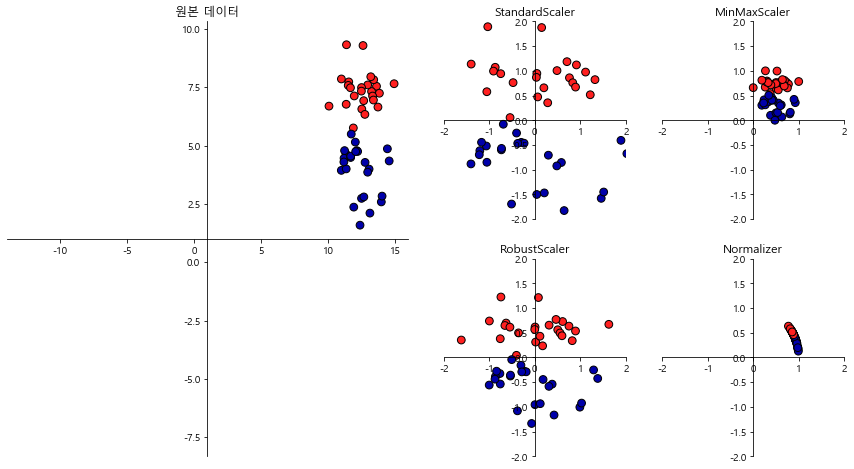

In [9]:
mglearn.plots.plot_scaling()

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [11]:
from sklearn.preprocessing import MinMaxScaler   #preprocessiong : 전처리     ~ feature 기반으로 작동

scaler = MinMaxScaler()  #객체 생성

In [14]:
scaler.fit(X_train)  #데이터 연결만 한다 : 데이터 차원 확인하는 것.

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)       #여기서 데이터 적용
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적입니다
X_scaled_d = scaler.fit_transform(X_train)

X_scaled_d

array([[ 0.306,  2.595,  0.462, ...,  1.815,  2.102,  3.386],
       [ 0.234, -0.053,  0.206, ...,  0.514,  0.147,  0.052],
       [ 0.156,  0.183,  0.113, ...,  0.694,  0.263, -0.1  ],
       ...,
       [ 0.856,  1.193,  0.898, ...,  1.13 ,  0.756,  2.971],
       [-0.025,  0.441, -0.086, ..., -0.525, -1.129, -0.456],
       [-0.303, -0.21 , -0.375, ..., -0.968, -1.544, -1.315]])

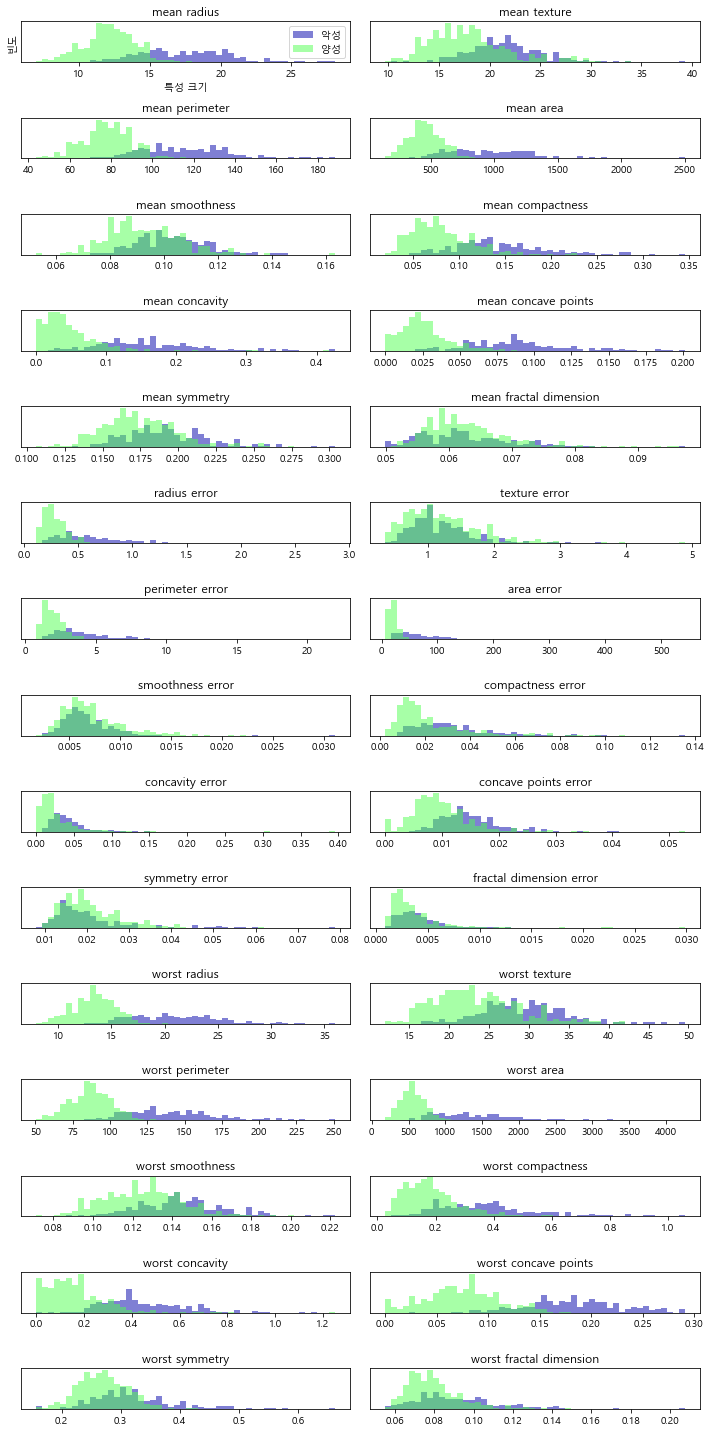

In [19]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel() #cancer_feature : 30개 ~ 15*2 _2차원 => 30개로 1차원으로 쭉 늘렸다. 

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [20]:
_, bins = np.histogram(cancer.data[:, 1], bins=50)

In [21]:
_

array([ 1,  4,  3,  3,  6, 19, 12, 19, 24, 22, 33, 21, 36, 28, 36, 37, 27,
       32, 23, 26, 30, 22, 14,  8, 15, 12, 13,  1,  8,  6,  6,  7,  2,  5,
        1,  2,  1,  0,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  1],
      dtype=int64)

In [22]:
bins

array([ 9.71 , 10.301, 10.893, 11.484, 12.076, 12.667, 13.258, 13.85 ,
       14.441, 15.033, 15.624, 16.215, 16.807, 17.398, 17.99 , 18.581,
       19.172, 19.764, 20.355, 20.947, 21.538, 22.129, 22.721, 23.312,
       23.904, 24.495, 25.086, 25.678, 26.269, 26.861, 27.452, 28.043,
       28.635, 29.226, 29.818, 30.409, 31.   , 31.592, 32.183, 32.775,
       33.366, 33.957, 34.549, 35.14 , 35.732, 36.323, 36.914, 37.506,
       38.097, 38.689, 39.28 ])

In [23]:
cancer.data

array([[ 17.99 ,  10.38 , 122.8  , ...,   0.265,   0.46 ,   0.119],
       [ 20.57 ,  17.77 , 132.9  , ...,   0.186,   0.275,   0.089],
       [ 19.69 ,  21.25 , 130.   , ...,   0.243,   0.361,   0.088],
       ...,
       [ 16.6  ,  28.08 , 108.3  , ...,   0.142,   0.222,   0.078],
       [ 20.6  ,  29.33 , 140.1  , ...,   0.265,   0.409,   0.124],
       [  7.76 ,  24.54 ,  47.92 , ...,   0.   ,   0.287,   0.07 ]])

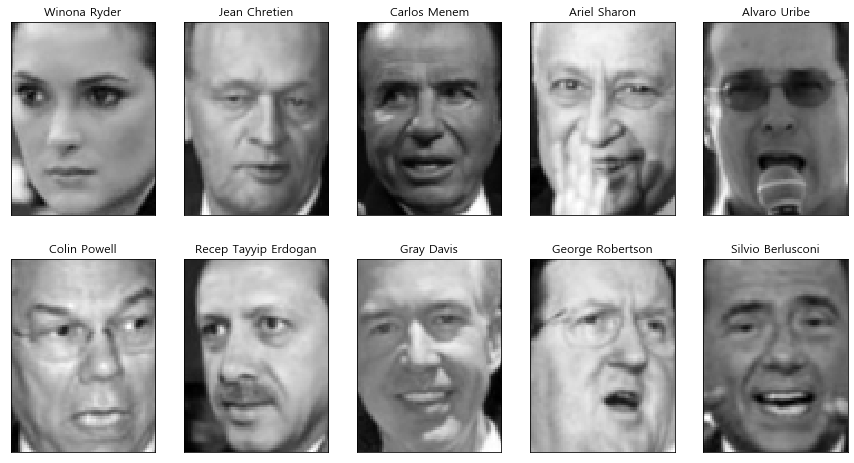

In [24]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)  #한 이미지당 최소 20개 이미지가 있음.
                                                                #원사이즈 보다 70%로 축소해서 가져옴

image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):   #2*5 = 10개만 
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [40]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A6CBB30BC8>,
      dtype=object)

In [42]:
axes.ravel()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A6CBB30BC8>,
      dtype=object)

In [25]:
people #image 가 이미지 데이터 : 3차원이다.  [[[]]]

{'data': array([[ 57.   ,  60.333,  78.   , ...,  17.333,  16.667,  22.667],
        [ 66.667,  80.667,  88.667, ...,   8.667,   8.333,   9.333],
        [ 18.667,  14.333,  15.   , ...,  22.667,  22.667,  25.667],
        ...,
        [ 77.333,  90.333,  93.333, ..., 233.667, 234.333, 230.667],
        [ 87.667,  71.667,  63.333, ...,  96.   ,  92.333,  96.333],
        [ 91.   ,  90.667,  94.667, ...,  40.333,  42.333,  42.333]],
       dtype=float32),
 'images': array([[[ 57.   ,  60.333,  78.   , ...,  40.667,  36.667,  34.   ],
         [ 52.667,  60.   ,  92.   , ...,  46.667,  36.   ,  30.   ],
         [ 46.   ,  66.   , 113.333, ...,  51.   ,  43.333,  37.667],
         ...,
         [ 61.   ,  62.667,  62.333, ...,  19.   ,  18.333,  18.667],
         [ 62.667,  64.667,  67.   , ...,  17.333,  18.   ,  22.333],
         [ 65.333,  68.   ,  67.   , ...,  17.333,  16.667,  22.667]],
 
        [[ 66.667,  80.667,  88.667, ...,  81.333,  78.667,  70.667],
         [ 66.333,  78. 

In [46]:
t=zip(people.target, people.images, axes.ravel())
t
list(t)

[(61, array([[ 57.   ,  60.333,  78.   , ...,  40.667,  36.667,  34.   ],
         [ 52.667,  60.   ,  92.   , ...,  46.667,  36.   ,  30.   ],
         [ 46.   ,  66.   , 113.333, ...,  51.   ,  43.333,  37.667],
         ...,
         [ 61.   ,  62.667,  62.333, ...,  19.   ,  18.333,  18.667],
         [ 62.667,  64.667,  67.   , ...,  17.333,  18.   ,  22.333],
         [ 65.333,  68.   ,  67.   , ...,  17.333,  16.667,  22.667]],
        dtype=float32), <matplotlib.axes._subplots.AxesSubplot at 0x2a6cbb30bc8>),
 (25, array([[66.667, 80.667, 88.667, ..., 81.333, 78.667, 70.667],
         [66.333, 78.   , 83.333, ..., 81.   , 79.   , 75.333],
         [69.333, 80.667, 77.667, ..., 80.333, 79.333, 78.   ],
         ...,
         [45.   , 44.   , 39.667, ...,  8.   ,  7.   ,  7.667],
         [45.667, 44.   , 40.667, ...,  8.   ,  7.667,  7.667],
         [44.667, 42.667, 39.333, ...,  8.667,  8.333,  9.333]],
        dtype=float32), <matplotlib.axes._subplots.AxesSubplot at 0x2a6cb9b

In [26]:
people.images.shape  #3차원 확인

(3023, 87, 65)

In [29]:
a=people.images[0]  #이미지 사이즈
a.shape

(87, 65)

In [47]:
print(people.target[0:10]) #인덱스
print(people.target_names[people.target[0:10]]) #인덱스 해당 이름 

(array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54], dtype=int64),
 array(['Winona Ryder', 'Jean Chretien', 'Carlos Menem', 'Ariel Sharon',
        'Alvaro Uribe', 'Colin Powell', 'Recep Tayyip Erdogan',
        'Gray Davis', 'George Robertson', 'Silvio Berlusconi'],
       dtype='<U25'))

In [30]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))  #사람 갯수(사람 클래스)

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [56]:
people.shape #원 데이터 : bunch 형태 _ 딕셔너리로 접근(접근하면 데이터 형식 : 넘파이)

AttributeError: shape

In [34]:
people.target

array([61, 25,  9, ..., 14, 15, 14], dtype=int64)

In [32]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)   #사람마다 준비된 데이터 갯수가 같은지 확인하기 위한 작업.
counts

#양의 비등이 다르다. 

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24], dtype=int64)

In [59]:
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')  # {x1 : x2} ~ 공백 
    if (i + 1) % 3 == 0:    #3개 찍고 줄바꿈.
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)
#np.zeros : 타겟크기만큼 0으로 채워서 만듬

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    #where : 조건절 ~ 조건에 맞으면 1로
    #편중을 없애기 위해 사람마다 50개만 추출
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

In [62]:
people

{'data': array([[ 57.   ,  60.333,  78.   , ...,  17.333,  16.667,  22.667],
        [ 66.667,  80.667,  88.667, ...,   8.667,   8.333,   9.333],
        [ 18.667,  14.333,  15.   , ...,  22.667,  22.667,  25.667],
        ...,
        [ 77.333,  90.333,  93.333, ..., 233.667, 234.333, 230.667],
        [ 87.667,  71.667,  63.333, ...,  96.   ,  92.333,  96.333],
        [ 91.   ,  90.667,  94.667, ...,  40.333,  42.333,  42.333]],
       dtype=float32),
 'images': array([[[ 57.   ,  60.333,  78.   , ...,  40.667,  36.667,  34.   ],
         [ 52.667,  60.   ,  92.   , ...,  46.667,  36.   ,  30.   ],
         [ 46.   ,  66.   , 113.333, ...,  51.   ,  43.333,  37.667],
         ...,
         [ 61.   ,  62.667,  62.333, ...,  19.   ,  18.333,  18.667],
         [ 62.667,  64.667,  67.   , ...,  17.333,  18.   ,  22.333],
         [ 65.333,  68.   ,  67.   , ...,  17.333,  16.667,  22.667]],
 
        [[ 66.667,  80.667,  88.667, ...,  81.333,  78.667,  70.667],
         [ 66.333,  78. 

In [61]:
people.target #인덱스 번호

array([61, 25,  9, ..., 14, 15, 14], dtype=int64)

In [60]:
people.target.shape

(3023,)

In [71]:
for target in np.unique(people.target):
    print(target)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


In [68]:
type(np.where(people.target == target))

tuple

In [79]:
np.where(people.target == 0)

(array([  58,   72,   90,  314,  494,  496,  598,  650,  960, 1078, 1212,
        1243, 1265, 1356, 1497, 1586, 1622, 1793, 1803, 1816, 1881, 1952,
        1962, 2003, 2068, 2179, 2183, 2239, 2373, 2441, 2510, 2535, 2622,
        2649, 2651, 2697, 2819, 2960, 2998], dtype=int64),)

In [73]:
np.where(people.target == 1)

(array([   4,   17,   41,   87,  142,  216,  333,  413,  417,  508,  857,
         876,  940,  944,  949, 1165, 1307, 1505, 1529, 1539, 1729, 1807,
        1837, 1933, 2211, 2243, 2254, 2269, 2285, 2290, 2360, 2387, 2616,
        2636, 2926], dtype=int64),)

In [36]:
np.where(people.target == target)[0]  #ID를 뽑아서 -> 인덱스 추출

array([   9,  138,  225,  402,  421,  526,  601,  656,  667,  833,  893,
        957, 1007, 1022, 1302, 1304, 1376, 1437, 1515, 1764, 1772, 1779,
       1861, 1866, 1869, 1995, 1997, 2104, 2196, 2843, 2844, 2892, 2894],
      dtype=int64)

In [80]:
np.where(people.target == target)[0].shape

(24,)

In [35]:
np.where(people.target == target)[0][:50]

array([   9,  138,  225,  402,  421,  526,  601,  656,  667,  833,  893,
        957, 1007, 1022, 1302, 1304, 1376, 1437, 1515, 1764, 1772, 1779,
       1861, 1866, 1869, 1995, 1997, 2104, 2196, 2843, 2844, 2892, 2894],
      dtype=int64)

In [37]:
people.target

array([61, 25,  9, ..., 14, 15, 14], dtype=int64)

In [38]:
target

54

In [75]:
mask = np.zeros(people.target.shape, dtype=np.bool)
mask

array([False, False, False, ..., False, False, False])

In [76]:
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
mask

array([ True,  True,  True, ..., False, False, False])

In [81]:
mask.shape

(3023,)

In [83]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1  
    #편중을 없애기 위해 사람마다 50개만 추출하는 과정, 특정 타겟 ID 뽑아서 50개만 추출 한 인덱스 -> 해당 자리에 =1 
    
X_people = people.data[mask]     # -> 50개만 뽑아진 True/False 
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

In [84]:
X_people

array([[0.224, 0.237, 0.306, ..., 0.068, 0.065, 0.089],
       [0.261, 0.316, 0.348, ..., 0.034, 0.033, 0.037],
       [0.073, 0.056, 0.059, ..., 0.089, 0.089, 0.101],
       ...,
       [0.142, 0.088, 0.11 , ..., 0.056, 0.026, 0.021],
       [0.212, 0.256, 0.221, ..., 0.822, 0.824, 0.833],
       [0.434, 0.503, 0.57 , ..., 0.055, 0.055, 0.054]], dtype=float32)

In [86]:
X_people.shape

(2063, 5655)

In [85]:
y_people  #ID_라벨링

array([61, 25,  9, ...,  9, 37, 22], dtype=int64)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


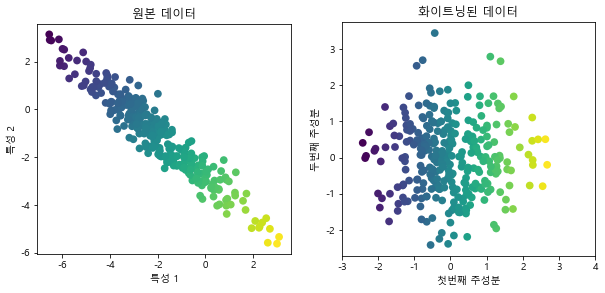

In [91]:
mglearn.plots.plot_pca_whitening()

In [93]:
X_people.shape

(2063, 5655)

In [92]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)  #100차원으로 줄여서(주성분 100)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)
